In [17]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def mad(x):
    return np.median(np.fabs(x-np.median(x)))

k = 1.4826

def hist(x,mu,vlines=[],labels=[],bins=50):
    hist,binEdges = np.histogram(x,bins=bins)
    area = np.sum(hist*(binEdges[1]-binEdges[0]))
    barlist = plt.bar(binEdges[:-1],hist/area,width = binEdges[1]-binEdges[0],alpha=0.5)
    plt.xlim(min(x),max(x))
    colors = plt.get_cmap('plasma')(np.linspace(0.3,0.85,len(vlines)))
    for l in range(len(vlines)):
        plt.axvline(mu-vlines[l],color=colors[l],lw=4,label=labels[l])
        plt.axvline(mu+vlines[l],color=colors[l],lw=4)
    if len(colors) !=0:
        plt.legend(loc='best')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


9.98970758248 9.99790676551


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


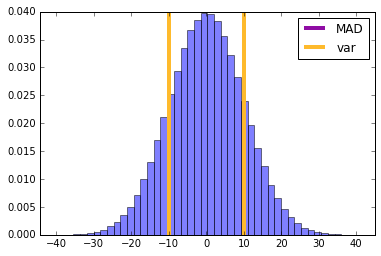

In [18]:
N = 1e6
mu = 0
sigma = 10
y = sigma*np.random.randn(N)+mu
print k*mad(y),np.std(y)
hist(y,mu,vlines=[k*mad(y),np.std(y)],labels=['MAD','var'])

6.85114242959 7.90990730742


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


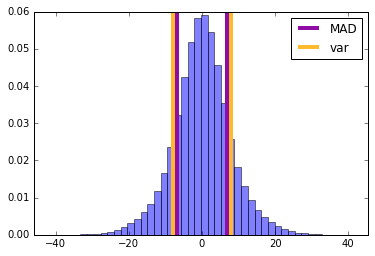

In [19]:
N = 1e6
mu = 0
sigma1 = 10
sigma2 = 5
y = np.concatenate((sigma1*np.random.randn(N/2.)+mu,sigma2*np.random.randn(N/2.)+mu))
print k*mad(y), np.std(y)
hist(y,mu,vlines=[k*mad(y),np.std(y)],labels=['MAD','var'])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


3.32420605928 6.48285784732


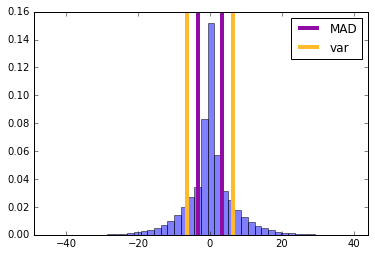

In [20]:
N = 1e6
mu = 0
sigma1 = 10
sigma2 = 5
sigma3 = 1
y = np.concatenate((sigma1*np.random.randn(N/3.)+mu,sigma2*np.random.randn(N/3.)+mu))
y = np.concatenate((y,sigma3*np.random.randn(N/3.)))
print k*mad(y), np.std(y) 
hist(y,mu,vlines=[k*mad(y),np.std(y)],labels=['MAD','var'])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.69773314564 5.62315282641


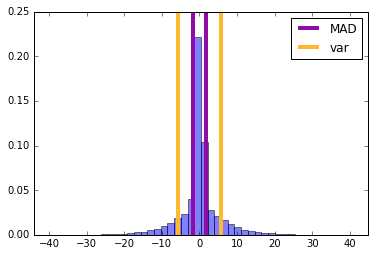

In [21]:
N = 1e6
mu = 0
sigma1 = 10
sigma2 = 5
sigma3 = 1
sigma4 = 0.5
y = np.concatenate((sigma1*np.random.randn(N/4.)+mu,sigma2*np.random.randn(N/4.)+mu))
y = np.concatenate((y,sigma3*np.random.randn(N/4.)))
y = np.concatenate((y,sigma4*np.random.randn(N/4.)))
print k*mad(y), np.std(y) 
hist(y,mu,vlines=[k*mad(y),np.std(y)],labels=['MAD','var'])

In [58]:
def mean_med(arr):
    meds = np.median(arr,axis=0)
    medarr = np.tile(meds,(arr.shape[0],1))
    medsub = np.median(abs(arr-medarr)**2,axis=0)
    return np.sqrt(np.mean(medsub))

def hist2d(fig,ax,x,y,bins=100,clabel=False,**kwargs):
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H)
    im = ax.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap('viridis'),
                   **kwargs)
    if clabel:
        cbar=fig.colorbar(im,pad = -0.05)
        cbar.set_label(label=clabel,fontsize=20)
        cbar.ax.tick_params(labelsize=20)
    elif not clabel:
        cbar=fig.colorbar(im,pad = -0.05)
        cbar.ax.tick_params(labelsize=20)
    return H
    

(100,)
0.997093486198 0.998408453248 (100,)
0.998053171659


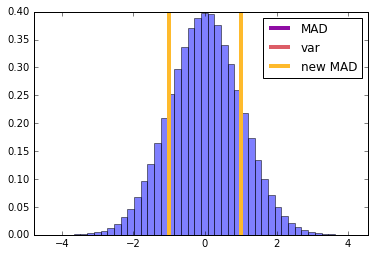

In [56]:
N = int(1e3)
D = int(1e2)
data = np.zeros((N,D))
mu = 0
sigma = 1
for n in range(N):
    data[n] = sigma*np.random.randn(D)+mu
hist(flatdata,mu,vlines=[k*mad(data),np.std(data),k*mean_med(data)],labels=['MAD','var','new MAD'])
print k*mad(data),np.std(data),k*mean_med(data)

(100,)
4.17415707167 6.10712637904 (100,)
4.18266780939


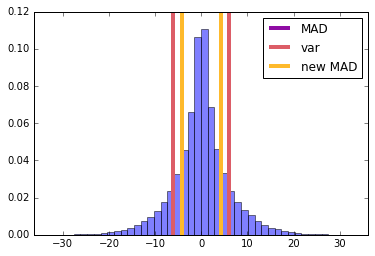

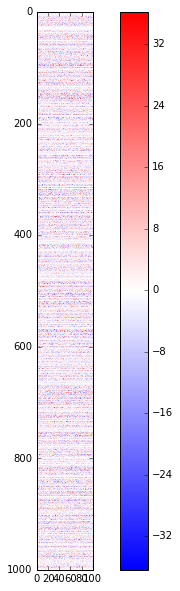

In [57]:
N = int(1e3)
D = int(1e2)
data = np.zeros((N,D))
mu = 0
sigmas = np.random.random_integers(1,high = 10,size=N)
for n in range(N):
    data[n] = sigmas[n]*np.random.randn(D)+mu
hist(data.flatten(),mu,vlines=[k*mad(data),np.std(data),k*mean_med(data)],labels=['MAD','var','new MAD'])
print k*mad(data),np.std(data),k*mean_med(data)
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='bwr')
plt.colorbar()

(1000,)
8.22905943587 11.8715736802 (1000,)
11.9505799723


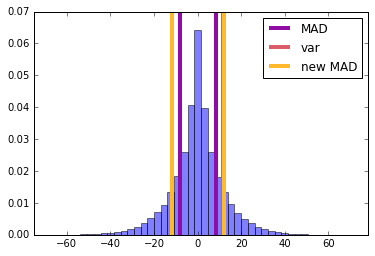

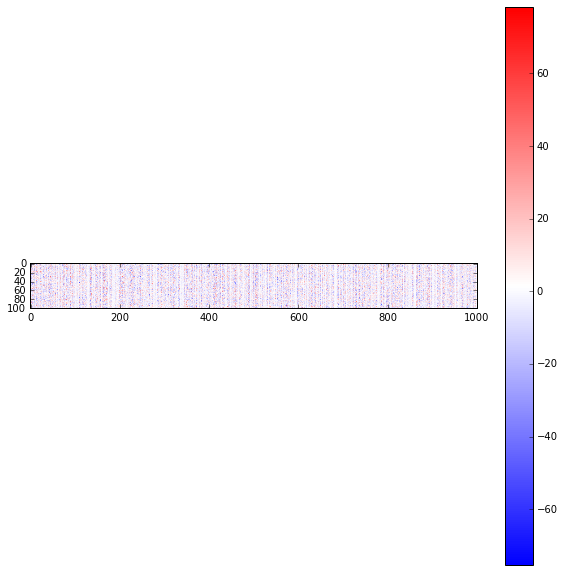

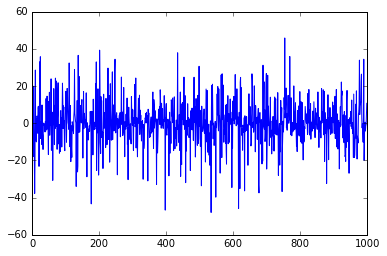

In [53]:
N = int(1e3)
D = int(1e2)
data = np.zeros((N,D))
mu = 0
sigmas = np.random.random_integers(1,high = 20,size=N)
for n in range(N):
    data[n] = sigmas[n]*np.random.randn(D)+mu
data = data.T
hist(data.flatten(),mu,vlines=[k*mad(data),np.std(data),k*mean_med(data)],labels=['MAD','var','new MAD'])
print k*mad(data),np.std(data),k*mean_med(data)
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='bwr')
plt.colorbar()
plt.figure()
plt.plot(data[0])

(1000,)
2.44056517603 3.29305346396 (1000,)
3.29538383501


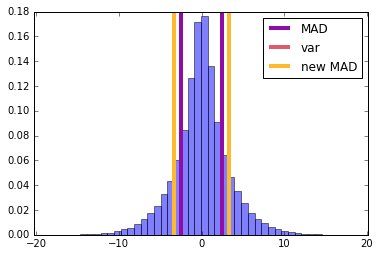

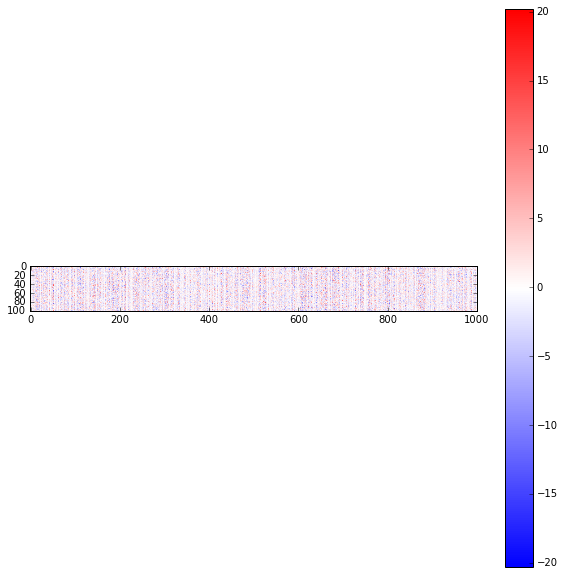

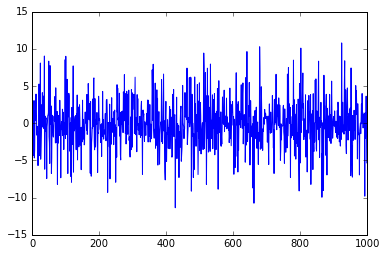

In [54]:
N = int(1e3)
D = int(1e2)
data = np.zeros((N,D))
mu = 0
sigmas = np.random.random_integers(1,high = 5,size=N)
for n in range(N):
    data[n] = sigmas[n]*np.random.randn(D)+mu
data = data.T
hist(data.flatten(),mu,vlines=[k*mad(data),np.std(data),k*mean_med(data)],labels=['MAD','var','new MAD'])
print k*mad(data),np.std(data),k*mean_med(data)
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='bwr')
plt.colorbar()
plt.figure()
plt.plot(data[0])

1.36918711433 1.58151449136 1.58011745485


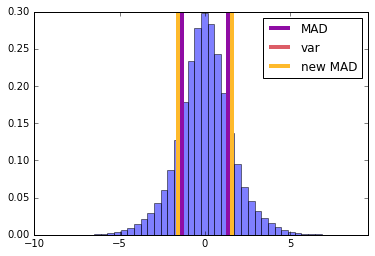

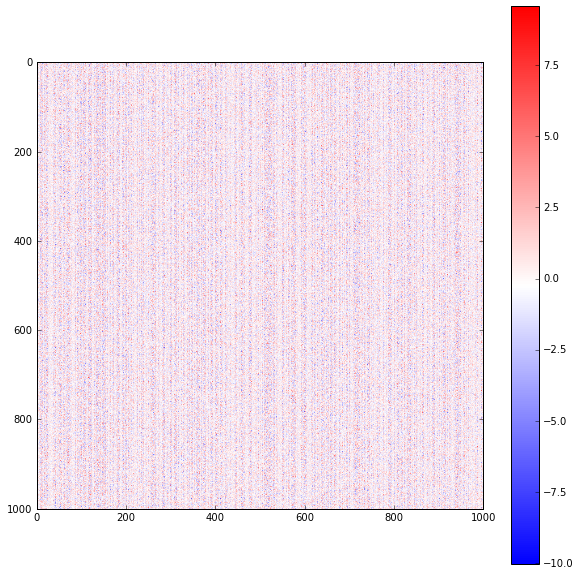

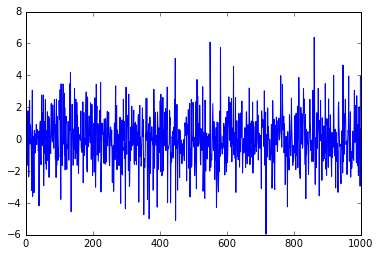

In [41]:
N = int(1e3)
D = int(1e3)
data = np.zeros((N,D))
mu = 0
sigmas = np.random.random_integers(1,high = 2,size=N)
for n in range(N):
    data[n] = sigmas[n]*np.random.randn(D)+mu
data = data.T
hist(data.flatten(),mu,vlines=[k*mad(data),np.std(data),k*mean_med(data)],labels=['MAD','var','new MAD'])
print k*mad(data),np.std(data),k*mean_med(data)
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='bwr')
plt.colorbar()
plt.figure()
plt.plot(data[0])